I will be following CRISP-DM(Cross Industry Standard Process for Data Mining) methodology to tackle this Customer Segmentation Project.

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

**1. Business Understanding:**

Domain knowledge is crucial for tackling any data science project.

My objective here is to develop a customer segmentation model to define a unique
marketing strategy for each segment identified.

The dataset consists of various stats of credit card users without a target label.

I have a credit line and am fairly familiar with credit card usage. Still, I will browse the internet to know the basics of the domain which will cover the Business Understanding process.

**2. Data Understanding:**

My Data Understanding part will include understanding the meaning of each feature provided in the dataset which can be accomplished by the Data Dictionary already provided.

My EDA(Exploratory Data Analysis) will help understand the features and their inter-relations if any in extreme detail.

**3. Data Preparation:**

* Missing value removal/imputation
* Feature Extraction and Dimensionality Reduction
* Feature Scaling

**4. Modelling:**

Since we are provided with unlabelled data,the problem statement comes under unsupervised learning or clustering. I will use K-Mean Clustering algorithm to accomplish this.

Additional Work if time permits: Once we segment the customers, We can create our own label with the segmentation achieved and train supervised learning models on the labelled data created by us and use future customer data to be classified in to any of the segment using that model to define marketing strategy.

**5. Evaluation:**

Evaluation of unsupervised learning model is fairly difficult since we don't have any labels. WCSS(Within Cluster Sum of Squares) is a good evaluating measure for relatively determining which no of cluster split is maximing the variance between clusters and maximing the similarity within cluster.

**6. Deployment:**

We can deploy a flask api using heroku to get future customer data as input and respond with the segment, the customers belong to, as output, so that business user can leverage this api so easily.

**EDA : Exploratory Data Analysis**

In [25]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [27]:
# load dataset
data = pd.read_csv('credit-card-data.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
features_initial = [data.columns]
features_initial
##We have 18 features, now using data dictionary , understand the features

[Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
       dtype='object')]

In [29]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Creating our own data dictionary with our understanding. In real life scenario, it is better to reach out to business to gain better understanding of the features if there are less than 50 features. In some medical/genetic datasets, there could be millions of features, where data understanding is not completely feasible.

1. **CUST_ID** Credit card holder ID - doesn't contain any valuable/meaningful insight so can be dropped.
2. **BALANCE** Monthly average balance (based on daily balance averages) - Balance is the amount you owe to your credit card company. Making a purchase increases balance while paying dues decreases balances.
3. **BALANCE_FREQUENCY** Ratio of last 12 months with balance. Percentage of months with balance/due.
4. **PURCHASES** Total purchase amount spent during last 12 months
5. **ONEOFF_PURCHASES** Total amount of one-off purchases
6. **INSTALLMENTS_PURCHASES** Total amount of installment purchases
7. **CASH_ADVANCE** Total cash-advance amount
8. **PURCHASES_FREQUENCY**-Frequency of purchases (percentage of months
with at least one purchase)
9. **ONEOFF_PURCHASES_FREQUENCY** Frequency of one-off-purchases
10. **PURCHASES_INSTALLMENTS_FREQUENCY** Frequency of installment
purchases
11. **CASH_ADVANCE_FREQUENCY** Cash-Advance frequency
12. **CASH_ADVANCE_TRX** Average amount per cash-advance transaction
13. **PURCHASES_TRX** Average amount per purchase transaction
14. **CREDIT_LIMIT** Credit limit
15. **PAYMENTS**-Total payments (due amount paid by the customer to decrease their
statement balance) in the period
16. **MINIMUM_PAYMENTS** Total minimum payments due in the period.
17. **PRC_FULL_PAYMENT**- Percentage of months with full payment of the due
statement balance
18. **TENURE** Number of months as a customer

The dataset contains 8950 rows, i.e., customer data, and 18 columns, i.e., features. 

**We will analyse the dataset to identify:**

1. Missing values
2. Distribution of the numerical variables
3. Outliers

In [30]:
#Drop Customer Id Column
data.drop('CUST_ID',axis=1,inplace = True)

In [32]:
#Variables with Missing Value percentage
data.apply(lambda x: sum(x.isnull()/len(data))*100).sort_values(axis=0,ascending=False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
TENURE                              0.000000
PURCHASES_FREQUENCY                 0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PRC_FULL_PAYMENT                    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
PAYMENTS                            0.000000
BALANCE                             0.000000
dtype: float64

CREDIT_LIMIT and MINIMUM_PAYMENTS features have a small percent of missing values which can be imputed

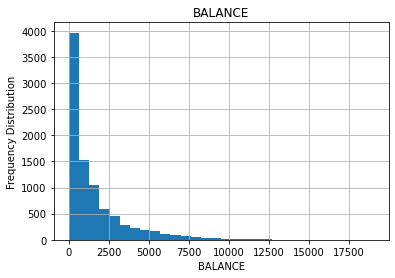

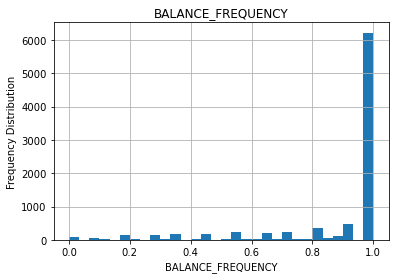

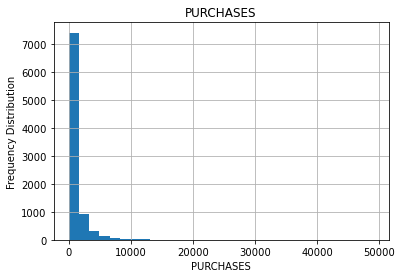

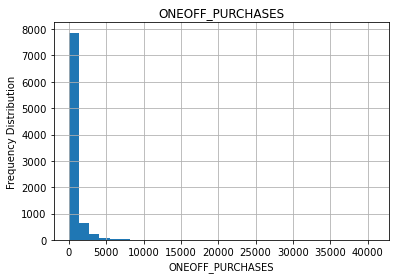

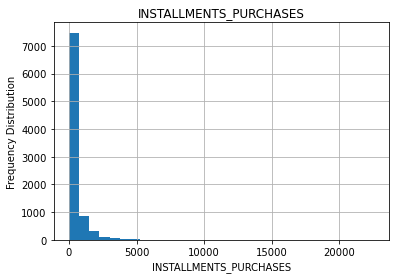

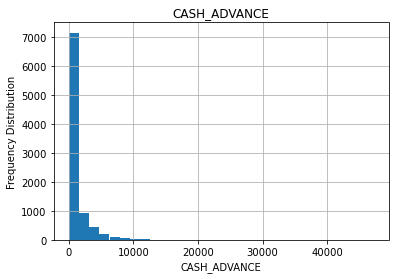

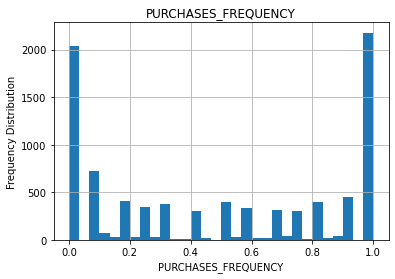

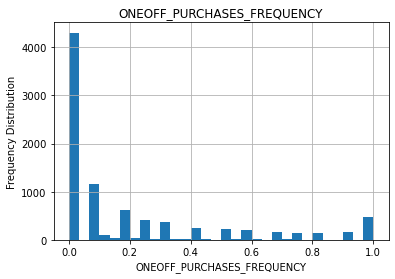

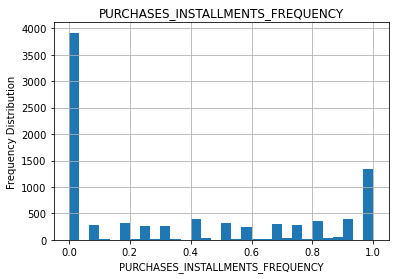

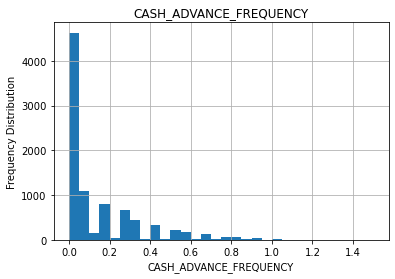

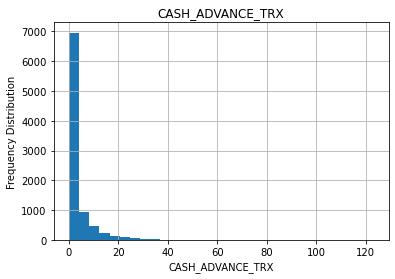

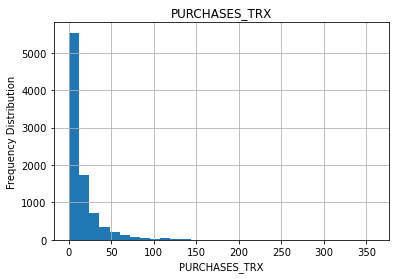

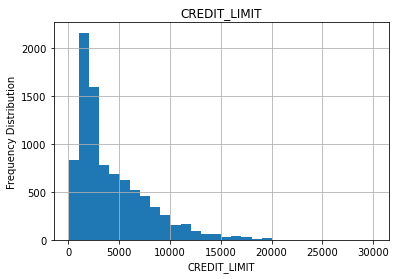

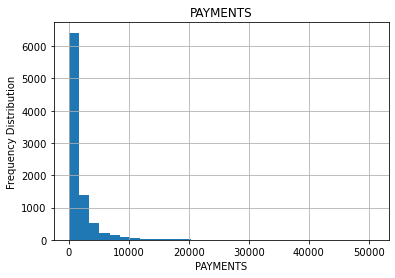

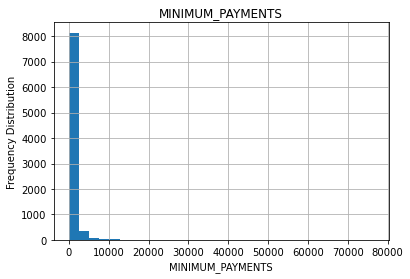

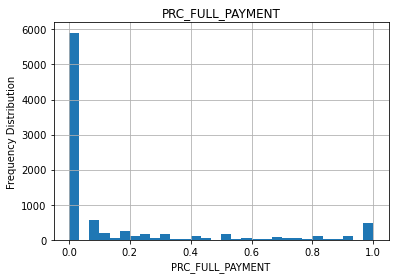

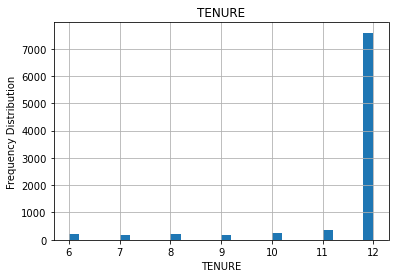

In [19]:
# Let's go ahead and analyse the distributions of the variables

def show_distribution(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Frequency Distribution')
    plt.xlabel(var)
    plt.title(var)
    plt.savefig(f"{var}_Distribution.png")
    plt.show()

for var in data.columns:
    show_distribution(data, var)

Almost no variable seems to have a normal distribution so log tranforming variables could improve performance.

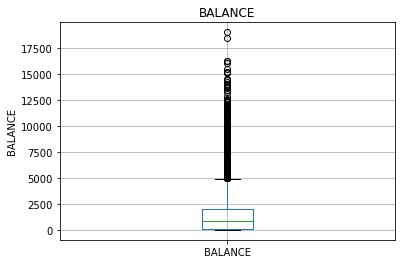

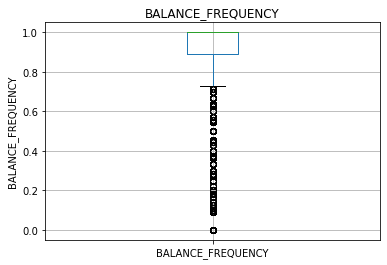

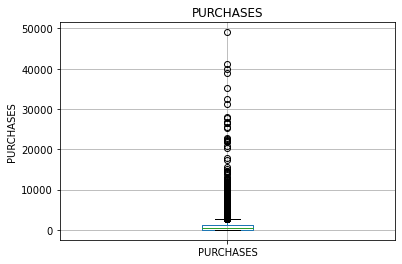

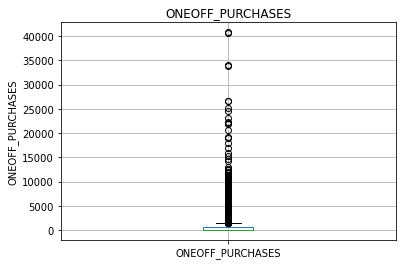

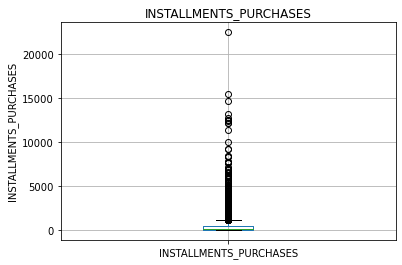

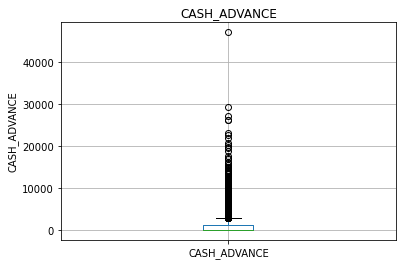

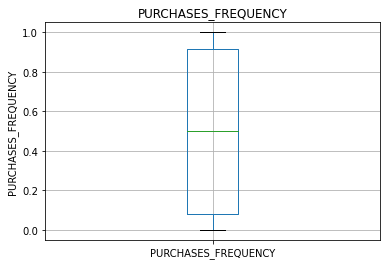

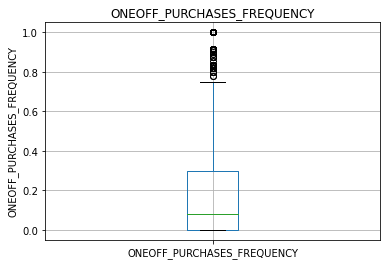

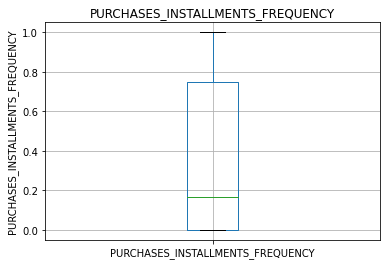

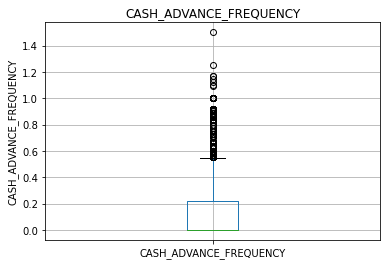

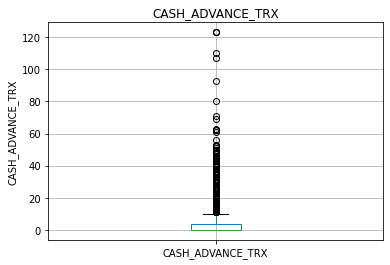

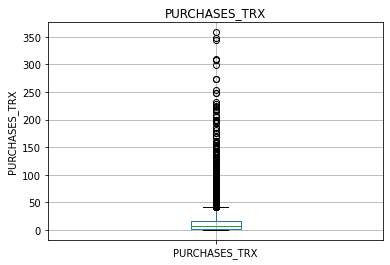

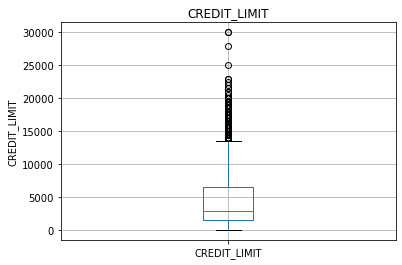

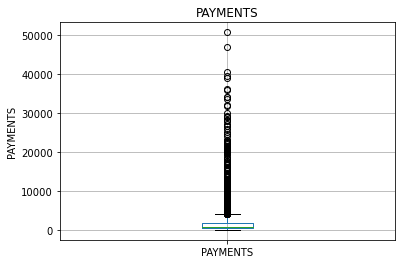

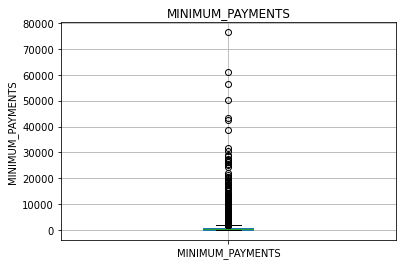

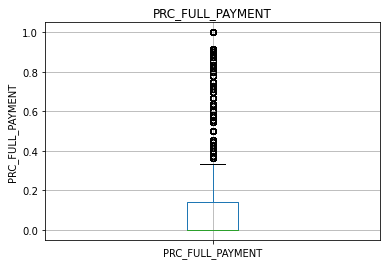

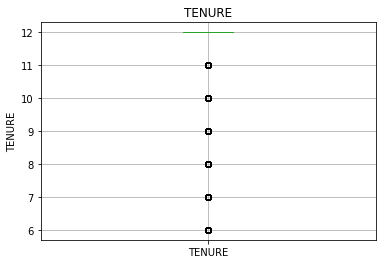

In [20]:
# let's make boxplots to visualise outliers in the continuous variables

def find_outliers(df, var):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.savefig(f"{var}_Box_Plot.png")
    plt.show()


for var in data.columns:
    find_outliers(data, var)

In [21]:
data_corr = data.corr()

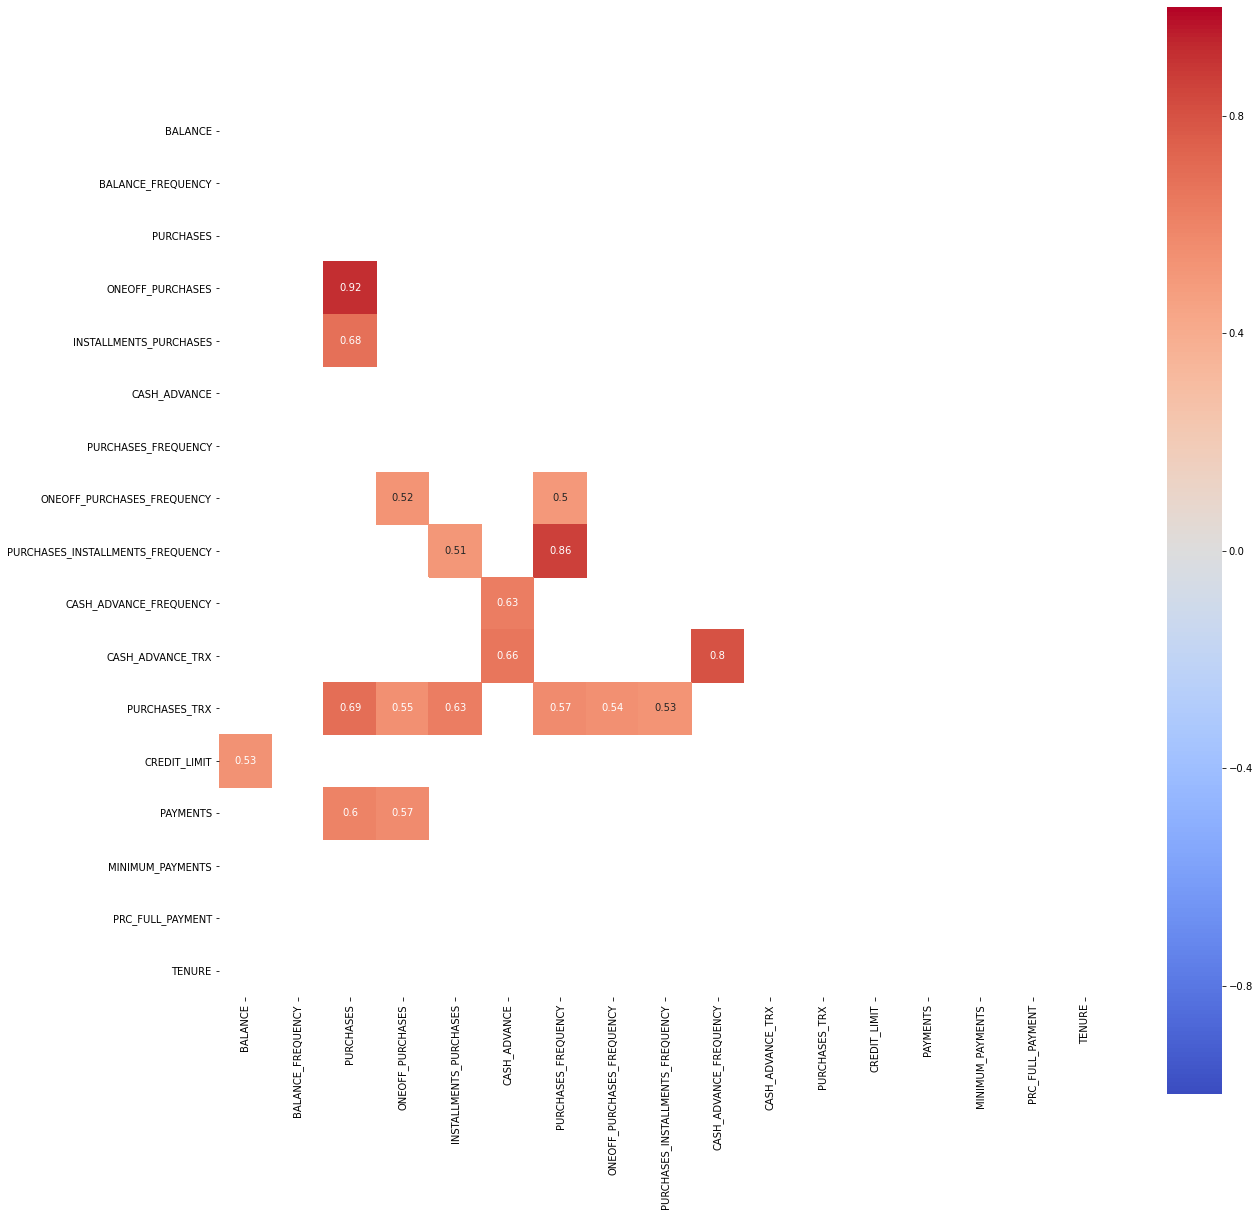

In [22]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 20))
matrix = np.triu(data_corr)
sns.heatmap(data_corr[(data_corr >= 0.5) | (data_corr <= -0.4)],annot=True,vmin=-1, vmax=1, 
            center= 0,cmap= 'coolwarm',square=True,mask=matrix)
plt.savefig("Correlation_HeatMap.png")